In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import scipy
from scipy.linalg import cholesky
from sklearn.metrics.cluster import normalized_mutual_info_score
from networkx.algorithms.community import greedy_modularity_communities
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/研究")

In [2]:
#空手クラブ
G = nx.karate_club_graph()
#LFR Benchmarkグラフ
#G = nx.LFR_benchmark_graph(100, 2, 1.5, 0.1, average_degree=4, min_community=50, seed=10)
#G = nx.LFR_benchmark_graph(100, 3, 1.5, 0.1, average_degree=5, min_community=20)
#dolphins
#G = nx.read_gml("dolphins.gml")
#簡易グラフ
#G = nx.Graph()
#G.add_nodes_from([1, 2, 3, 4, 5, 6])
#G.add_edges_from([(1, 2), (1, 3), (2, 3), (1, 4), (4, 5), (4, 6), (5, 6)])

colors = ['red', 'blue', 'green', 'yellow', 'pink', 'crimson', 'orange']
pos = nx.spring_layout(G)

print(nx.adjacency_matrix(G).todense())
print(G.nodes())
print(G.edges())
print('次数：', G.degree())

[[0 4 5 ... 2 0 0]
 [4 0 6 ... 0 0 0]
 [5 6 0 ... 0 2 0]
 ...
 [2 0 0 ... 0 4 4]
 [0 0 2 ... 4 0 5]
 [0 0 0 ... 4 5 0]]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]
次数： [(0, 16), (1, 9), (2, 10), (3, 

[frozenset({2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}), frozenset({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21})]


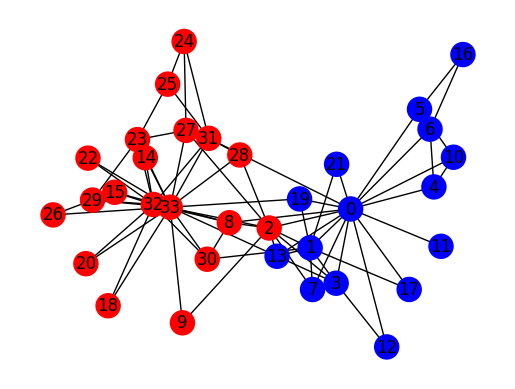

In [3]:
N = G.number_of_nodes()
M = G.number_of_edges()


#モジュラリティ最適化の関数
lst_m = greedy_modularity_communities(G, resolution=0.4)

"""
A = np.array(nx.adjacency_matrix(G).todense())
k = np.sum(A, axis=0)
#モジュラリティ行列B
B = np.array([[A[i, j] - ((k[i] * k[j]) / (2 * M))  for j in range(N)] for i in range(N)])
print('B :')
print(B)

#モジュラリティ行列 B の固有値,固有ベクトルを求める
values, vectors = np.linalg.eig(B)
print('固有値：')
print(sorted(values))
vectors = vectors.T
z = list(zip(values, vectors))
#固有値の昇順に並べ替える
z = sorted(z, key=lambda x :x[0])  
print('最大固有値と対応する固有ベクトル：')
print(z[-1][0])
print(z[-1][1])
v_max = z[-1][1]
s = np.zeros(N)
for i in range(len(v_max)):
  if v_max[i] < 0:
    s[i] = -1
  if v_max[i] >= 0:
    s[i] = 1
print(s)
group1 = []
group2 = []
for i in range(len(s)):
  if s[i] == -1:
    group1.append(i)
  if s[i] == 1:
    group2.append(i)
lst_m = [group1, group2]
print('ネットワーク分割結果：')
print(lst_m)
"""

print(lst_m)
#グラフの可視化
color_map = ['black'] * nx.number_of_nodes(G)
counter = 0
for c in lst_m :
  for n in c :
    color_map[n] = colors[counter]
  counter = counter + 1
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=color_map)
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.show()

[-1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21], [9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]


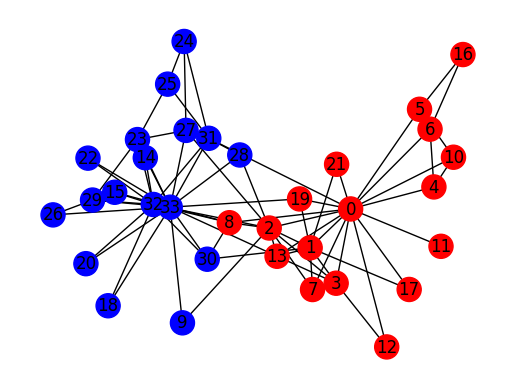

'\ncommunity = list({frozenset(G.nodes[v]["community"]) for v in G})\nbest_label = np.zeros(G.number_of_nodes())\nfor i in range(2):\n  for j in list(community[i]):\n    if i == 0:\n      best_label[j] = 1\n    if i == 1:\n      best_label[j] = -1\nprint(best_label)\n'

In [4]:
#頂点の属性は、「Officer」と「Mr. Hi」の属性を有している。
best_label = [1 if G.nodes[i]["club"]=="Officer" else -1 for i in G.nodes()]
print(best_label)
group3 = []
group4 = []
for i in range(G.number_of_nodes()):
  if best_label[i] < 0:
    group3.append(i)
  else:
    group4.append(i)
partition1 = [group3, group4]
print(partition1)
#グラフの可視化
color_map1 = ['black'] * nx.number_of_nodes(G)
counter = 0
for c in partition1 :
  for n in c :
    color_map1[n] = colors[counter]
  counter = counter + 1
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=color_map1)
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.show()
"""
community = list({frozenset(G.nodes[v]["community"]) for v in G})
best_label = np.zeros(G.number_of_nodes())
for i in range(2):
  for j in list(community[i]):
    if i == 0:
      best_label[j] = 1
    if i == 1:
      best_label[j] = -1
print(best_label)
"""

In [5]:

#モジュラリティ最適化の関数を用いるときに使う
s = np.zeros(N)
counter=0
for c in lst_m :
  for n in c :
    if counter==0:
      s[n] = 1
    if counter==1:
      s[n] = -1
  counter = counter + 1
print('s:', s)

s: [-1. -1.  1. -1. -1. -1. -1. -1.  1.  1. -1. -1. -1. -1.  1.  1. -1. -1.
  1. -1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [6]:
nmi = normalized_mutual_info_score(best_label, s)
print(nmi)

0.7323776321005694
